<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Familiarizing  with the Dataset

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [8]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Data Cleaning 

Checking for missing values

In [9]:
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

# Task 2: Generate Descriptive Statistics and Visualizations

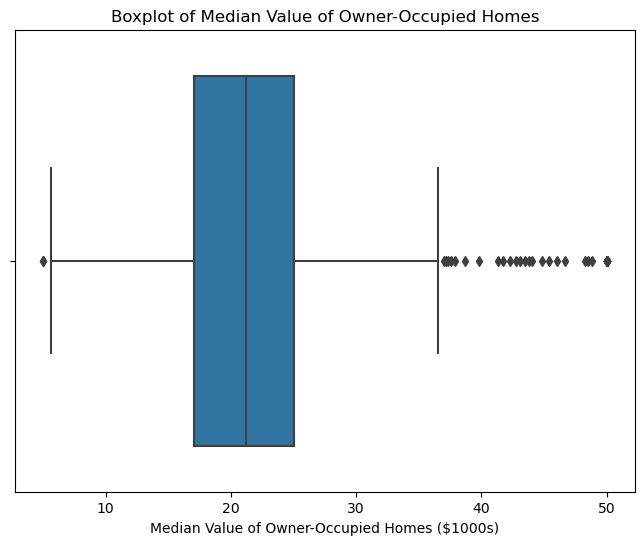

In [10]:
# Boxplot for MEDV
pyplot.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
pyplot.show()

This boxplot shows the distribution of median home values. The central box represents the interquartile range (IQR), the line in the middle of the box is the median, and the whiskers extend to 1.5 times the IQR. Outliers may be plotted as individual points outside the whiskers.

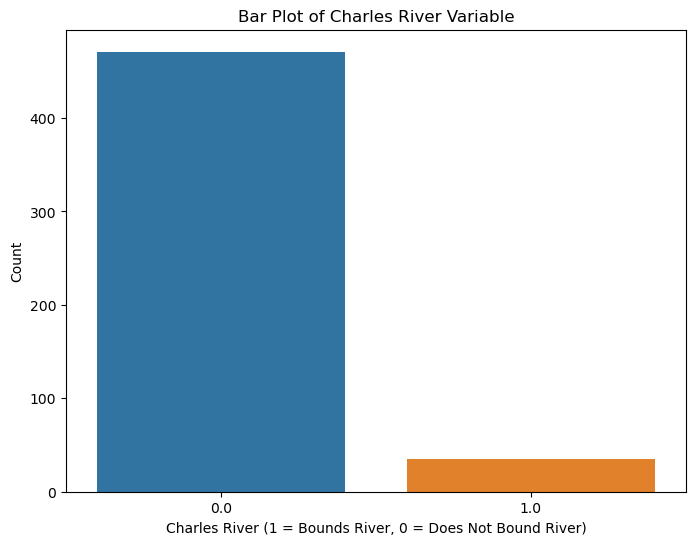

In [11]:
# Bar plot for CHAS
pyplot.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Charles River (1 = Bounds River, 0 = Does Not Bound River)')
pyplot.ylabel('Count')
pyplot.show()

The counts of properties that do and do not bound the Charles River. It helps in understanding the distribution of this categorical variable.

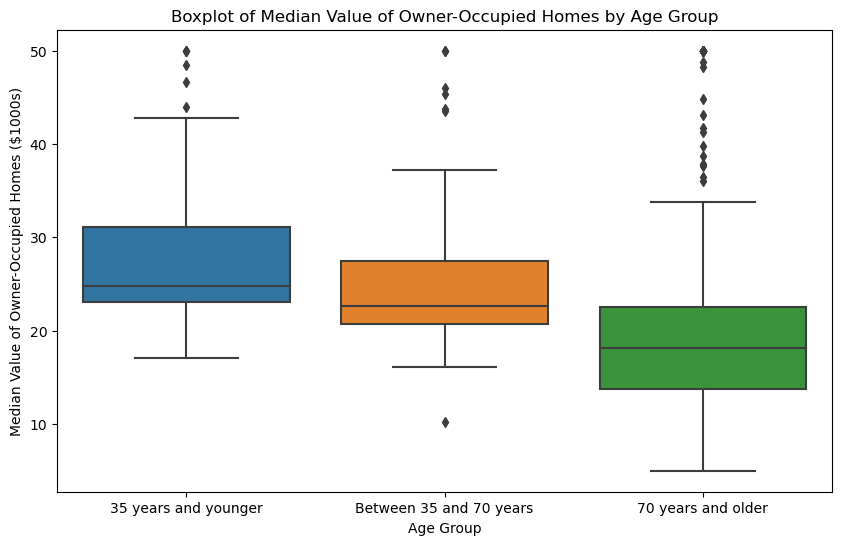

In [12]:
# Discretize AGE into groups
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Boxplot for MEDV vs AGE_GROUP
pyplot.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
pyplot.show()

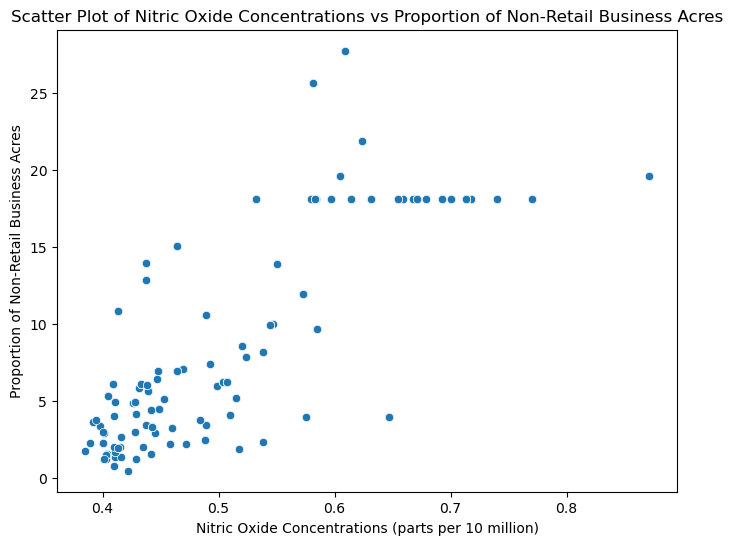

In [13]:
# Scatter plot for NOX vs INDUS
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
pyplot.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
pyplot.ylabel('Proportion of Non-Retail Business Acres')
pyplot.show()

The relationship between nitric oxide concentrations and the proportion of non-retail business acres. The positive correlation would suggest that higher nitric oxide concentrations are associated with more business areas.

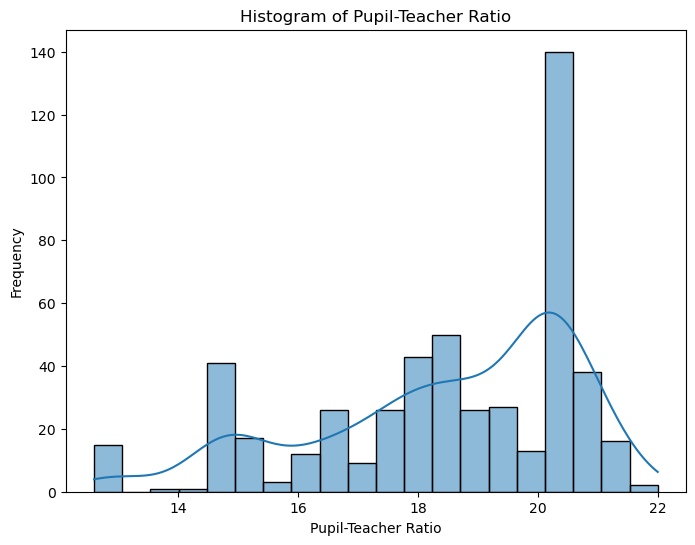

In [14]:
# Histogram for PTRATIO
pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

This histogram displays the distribution of the pupil-teacher ratio across the towns. It shows the frequency of different ratios and whether the distribution is skewed.

# Task 3: Use the appropriate tests to answer the questions provided.


1. Is there a significant difference in the median value of houses bounded by the Charles River or not? (T-test for independent samples)

Hypothesis:

Null Hypothesis (H₀): There is no significant difference in the median value of houses bounded by the Charles River (CHAS = 1) and those that are not (CHAS = 0).
Alternative Hypothesis (H₁): There is a significant difference in the median value of houses bounded by the Charles River and those that are not.

In [15]:
# Perform t-test
charles_river_group = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_charles_river_group = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(charles_river_group, no_charles_river_group, equal_var=False)

# Output the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 3.113291312794837, P-value: 0.003567170098137517


T-statistic: 3.11
P-value: 0.0036

Since the P-value (0.0036) is less than the significance level of 0.05, we reject the null hypothesis. This means there is a significant difference in the median value of houses bounded by the Charles River (CHAS = 1) compared to those that are not bounded by the Charles River (CHAS = 0).

This suggests that being near the Charles River does impact the median value of houses.


2. Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

Null Hypothesis (H₀): There is no significant difference in median values of houses (MEDV) for different proportions of owner-occupied units built prior to 1940 (AGE groups).

Alternative Hypothesis (H₁): There is a significant difference in median values of houses for different AGE groups.

In [17]:
# Discretize AGE into groups
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Perform ANOVA
anova_model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

anova_table


,sum_sq,df,F,PR(>F)
C(AGE_GROUP),5401.731883,2.0,36.40765,1.710501e-15
Residual,37314.563532,503.0,NaN,NaN


Since the P-value (1.71e-15) is much smaller than the significance level of 0.05, we reject the null hypothesis. This indicates that there is a significant difference in the median values of houses (MEDV) across different age groups of owner-occupied units built prior to 1940 (AGE_GROUP).

This result suggests that the proportion of older buildings has a significant impact on the median value of homes in those areas.

3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)
Hypothesis:

Null Hypothesis (H₀): There is no significant linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).
Alternative Hypothesis (H₁): There is a significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres.

In [18]:
corr_coef, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation Coefficient: {corr_coef}, P-value: {p_value}")

Correlation Coefficient: 0.7636514469209151, P-value: 7.913361061238693e-98


Since the P-value (7.91e-98) is much smaller than the significance level of 0.05, and the correlation coefficient (0.76) is high, we reject the null hypothesis. This indicates that there is a significant linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

The positive correlation coefficient (0.76) suggests a strong positive relationship: as Nitric oxide concentrations increase, the proportion of non-retail business acres per town also increases.

4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis)
Hypothesis:

Null Hypothesis (H₀): The weighted distance to the five Boston employment centers (DIS) has no impact on the median value of owner-occupied homes (MEDV).
Alternative Hypothesis (H₁): The weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.

In [19]:
# Perform regression analysis
regression_model = ols('MEDV ~ DIS', data=boston_df).fit()

regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        16:23:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hypothesis:

Null Hypothesis (H₀): The weighted distance to the five Boston employment centers (DIS) has no impact on the median value of owner-occupied homes (MEDV).
Alternative Hypothesis (H₁): The weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.
Test Statistics:

The coefficient for DIS is 1.0916 with a p-value of 0.000, which is less than the significance level of 0.05.
Conclusion:

Since the p-value for the DIS coefficient is less than 0.05, we reject the null hypothesis. This indicates that the weighted distance to the five Boston employment centers does have a significant impact on the median value of owner-occupied homes. For every additional unit of weighted distance, the median value of homes increases by approximately $1,091.60.
The low R-squared value (0.062) suggests that the model explains only a small portion of the variability in the median home values, indicating that other factors might also be influencing MEDV.